In [1]:
import pandas as pd
import datetime
from pathlib import Path
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [2]:
file_path = Path("Resources/cad_jpy.csv")
cad_jpy = pd.read_csv(file_path, index_col='Date', infer_datetime_format=True, parse_dates=True)
cad_jpy.head()

,Price,Open,High,Low
Date,,,,
1982-01-05,184.65,184.65,184.65,184.65
1982-01-06,185.06,185.06,185.06,185.06
1982-01-07,186.88,186.88,186.88,186.88
1982-01-08,186.58,186.58,186.58,186.58
1982-01-11,187.64,187.64,187.64,187.64


In [3]:
# Trim the dataset to begin on January 1st, 1990
cad_jpy_90 = cad_jpy.loc["1990-01-01":, :]
cad_jpy_90.head()

,Price,Open,High,Low
Date,,,,
1990-01-02,126.37,126.31,126.37,126.31
1990-01-03,125.30,125.24,125.30,125.24
1990-01-04,123.46,123.41,123.46,123.41
1990-01-05,124.54,124.48,124.54,124.48
1990-01-08,124.27,124.21,124.27,124.21


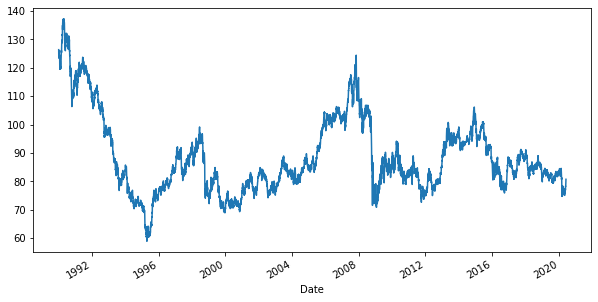

In [4]:
# Plot just the "Price" column from the dataframe:
cad_jpy_90.Price.plot(figsize=(10,5))

In [5]:
#Question: Do you see any patterns, long-term and/or short?

In [16]:
import statsmodels.api as sm
# Apply the Hodrick-Prescott Filter by decomposing the exchange rate price into two separate series:
cad_jpy_noise, cad_jpy_trend = sm.tsa.filters.hpfilter(cad_jpy_90["Price"])
# Create a dataframe of just the exchange rate price, and add columns for "noise" and "trend" series from above:
cad_jpy_HP = pd.DataFrame()
# Fetch data
cad_jpy_HP["Price"] = cad_jpy_90["Price"]
cad_jpy_HP["noise"] = cad_jpy_noise
cad_jpy_HP["trend"] = cad_jpy_trend
cad_jpy_HP.head()

,Price,noise,trend
Date,,,
1990-01-02,126.37,0.519095,125.850905
1990-01-03,125.30,-0.379684,125.679684
1990-01-04,123.46,-2.048788,125.508788
1990-01-05,124.54,-0.798304,125.338304
1990-01-08,124.27,-0.897037,125.167037


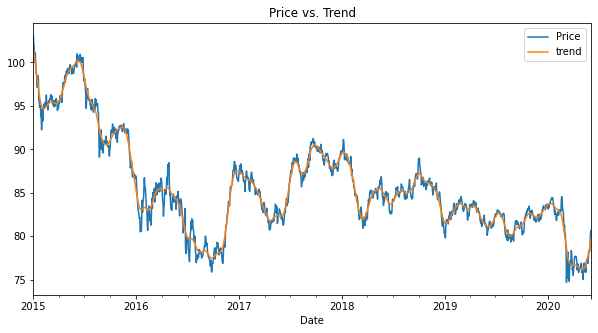

In [7]:
# Plot the Exchange Rate Price vs. the Trend for 2015 to the present
cad_jpy_PvsT = cad_jpy_HP.loc["2015-01-01" :, :]
cad_jpy_PvsT = cad_jpy_PvsT.drop(columns=["noise"])
cad_jpy_PvsT.plot(figsize=(10,5),title='Price vs. Trend')

In [8]:
#Question: Do you see any patterns, long-term and/or short? 
#Answer: YOUR ANSWER HERE

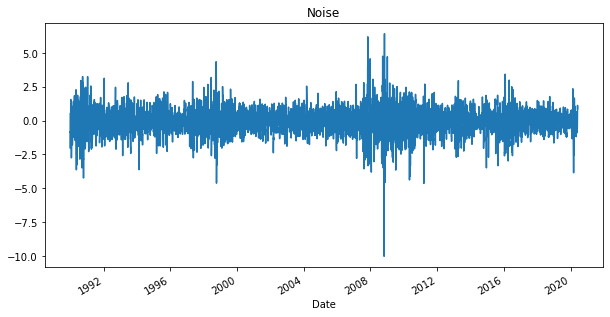

In [9]:
 # Plot the Settle Noise
cad_jpy_noise.plot(figsize=(10,5), title='Noise')

In [10]:
# Forecasting Returns using an ARMA Model
# Create a series using "Price" percentage returns, drop any nan"s, and check the results:
# (Make sure to multiply the pct_change() results by 100)
# In this case, you may have to replace inf, -inf values with np.nan"s
import numpy as np
returns = (cad_jpy[["Price"]].pct_change() * 100)
returns = returns.replace(-np.inf, np.nan).dropna()
returns.tail()

,Price
Date,
2020-05-29,0.076697
2020-06-01,1.251756
2020-06-02,1.425508
2020-06-03,0.373134
2020-06-04,0.012392


In [11]:
import statsmodels.api as sm

# Estimate and ARMA model using statsmodels (use order=(2, 1))
# YOUR CODE HERE!

# Fit the model and assign it to a variable called results
# YOUR CODE HERE!

In [12]:
# Output model summary results:

In [13]:
# Plot the 5 Day Returns Forecast

In [14]:
# Question: Based on the p-value, is the model a good fit?Answer: YOUR ANSWER HERE